In [2]:
import pandas_datareader.data as web
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
msft = web.get_data_yahoo("MSFT", start='2020-01-01', end = '2020-09-01')
msft.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-31,157.770004,156.449997,156.770004,157.699997,18369400.0,153.745209
2020-01-02,160.729996,158.330002,158.779999,160.619995,22622100.0,156.592026
2020-01-03,159.949997,158.059998,158.320007,158.619995,21116200.0,154.642166
2020-01-06,159.100006,156.509995,157.080002,159.029999,20813700.0,155.041870
2020-01-07,159.669998,157.320007,159.320007,157.580002,21634100.0,153.628250


In [5]:
msft.index

DatetimeIndex(['2019-12-31', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14',
               ...
               '2020-08-19', '2020-08-20', '2020-08-21', '2020-08-24',
               '2020-08-25', '2020-08-26', '2020-08-27', '2020-08-28',
               '2020-08-31', '2020-09-01'],
              dtype='datetime64[ns]', name='Date', length=170, freq=None)

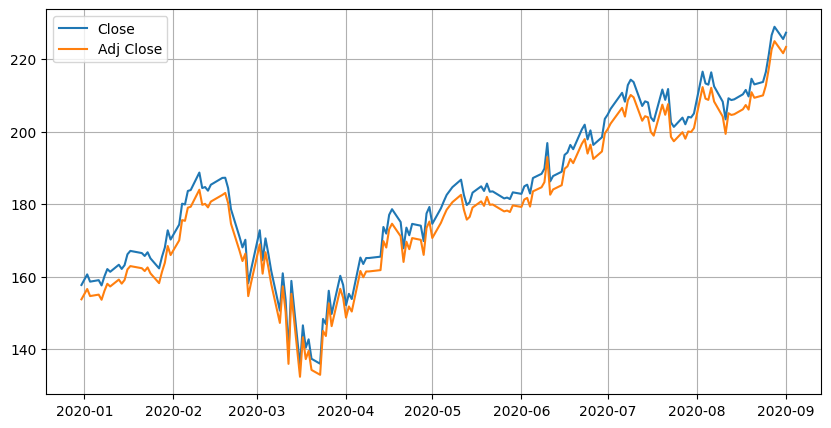

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(msft.index, msft.Close, label="Close")
plt.plot(msft.index, msft["Adj Close"], label="Adj Close")
plt.legend(loc='best')
plt.grid()

In [7]:
msft_ret = msft["Adj Close"].pct_change()
msft_ret.head()

Date
2019-12-31         NaN
2020-01-02    0.018516
2020-01-03   -0.012452
2020-01-06    0.002585
2020-01-07   -0.009118
Name: Adj Close, dtype: float64

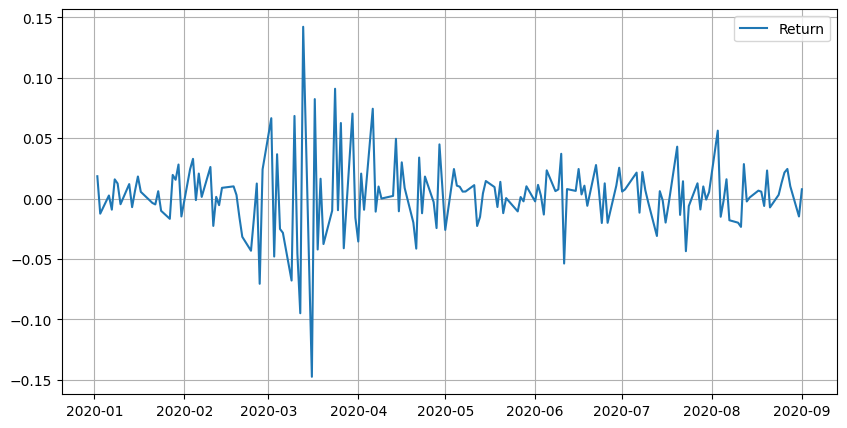

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(msft.index, msft_ret, label="Return")
plt.legend(loc='best')
plt.grid()

In [9]:
msft_ret.describe()

count    169.000000
mean       0.002689
std        0.030965
min       -0.147390
25%       -0.011628
50%        0.004339
75%        0.014568
max        0.142169
Name: Adj Close, dtype: float64

In [10]:
# data = web.get_data_fred('SP500', start='2016-01-02', end='2020-09-01')
data = web.DataReader(['SP500', 'WILL5000INDFC'], 'fred', start='2016-01-02', end='2020-09-01')
data.columns = ["S&P500", 'WilShire5000']
data.head()

,S&P500,WilShire5000
DATE,,
2016-01-04,2012.66,89.23
2016-01-05,2016.71,89.39
2016-01-06,1990.26,88.19
2016-01-07,1943.09,86.03
2016-01-08,1922.03,85.08


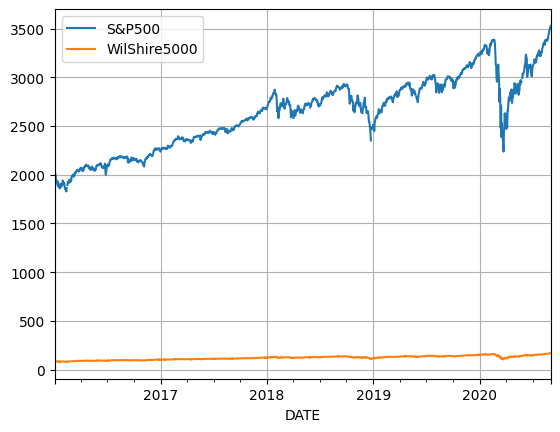

In [12]:
data.plot()
plt.legend(loc='best')
plt.grid()
plt.show()

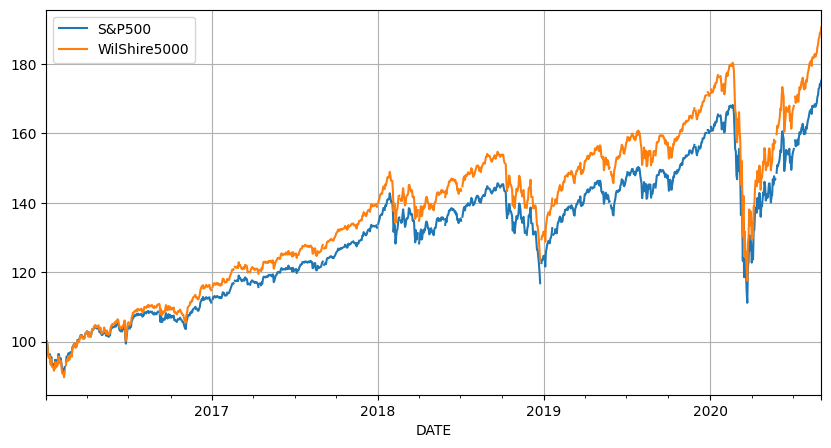

In [13]:
# SEt starting point to 100
( data / data.iloc[0] * 100).plot(figsize=(10, 5))
plt.legend(loc='best')
plt.grid()
plt.show()

In [14]:
cs = web.DataReader('CSUSHPINSA', 'fred', start='1990-01-01', end='2020-09-01')
cs.head()

,CSUSHPINSA
DATE,
1990-01-01,76.527
1990-02-01,76.587
1990-03-01,76.790
1990-04-01,77.038
1990-05-01,77.296


<AxesSubplot: xlabel='DATE'>

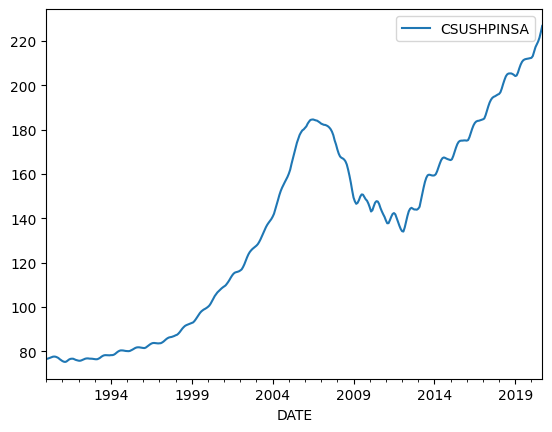

In [15]:
cs.plot()

In [18]:
ind = web.DataReader('5_industry_Portfolios', 'famafrench', start='2000-01-01', end='2020-09-01')
print(type(ind))
print(ind['DESCR'])

<class 'dict'>
5 industry Portfolios
---------------------

This file was created by CMPT_IND_RETS using the 202208 CRSP database. It contains value- and equal-weighted returns for 5 industry portfolios. The portfolios are constructed at the end of June. The annual returns are from January to December. Missing data are indicated by -99.99 or -999. Copyright 2022 Kenneth R. French

  0 : Average Value Weighted Returns -- Monthly (249 rows x 5 cols)
  1 : Average Equal Weighted Returns -- Monthly (249 rows x 5 cols)
  2 : Average Value Weighted Returns -- Annual (21 rows x 5 cols)
  3 : Average Equal Weighted Returns -- Annual (21 rows x 5 cols)
  4 : Number of Firms in Portfolios (249 rows x 5 cols)
  5 : Average Firm Size (249 rows x 5 cols)
  6 : Sum of BE / Sum of ME (21 rows x 5 cols)
  7 : Value-Weighted Average of BE/ME (21 rows x 5 cols)


In [21]:
(ind[0] / 100).head()

,Cnsmr,Manuf,HiTec,Hlth,Other
Date,,,,,
2000-01,-0.0795,-0.0496,-0.0454,0.0754,-0.0469
2000-02,-0.0511,-0.0475,0.1329,-0.0292,-0.0712
2000-03,0.1103,0.0819,0.0464,0.0030,0.1408
2000-04,-0.0204,0.0157,-0.1013,0.0528,-0.0312
2000-05,-0.0057,0.0131,-0.1076,0.0395,0.0340


<AxesSubplot: xlabel='Date'>

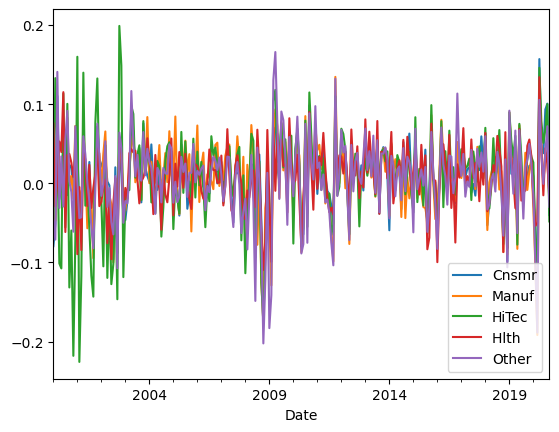

In [22]:
(ind[0] / 100).plot()

In [23]:
df = web.DataReader('005930', 'naver', start='2018-01-01', end='2020-09-01')
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2018-01-02,51380,51400,50780,51020,169485
2018-01-03,52540,52560,51420,51620,200270
2018-01-04,52120,52180,50640,51080,233909
2018-01-05,51300,52120,51200,52120,189623
2018-01-08,52400,52520,51500,52020,167673


In [24]:
df.Close.head()

Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
Name: Close, dtype: object

In [25]:
df.Close = df.Close.astype(float)
df.Close.head()

Date
2018-01-02    51020.0
2018-01-03    51620.0
2018-01-04    51080.0
2018-01-05    52120.0
2018-01-08    52020.0
Name: Close, dtype: float64

<AxesSubplot: xlabel='Date'>

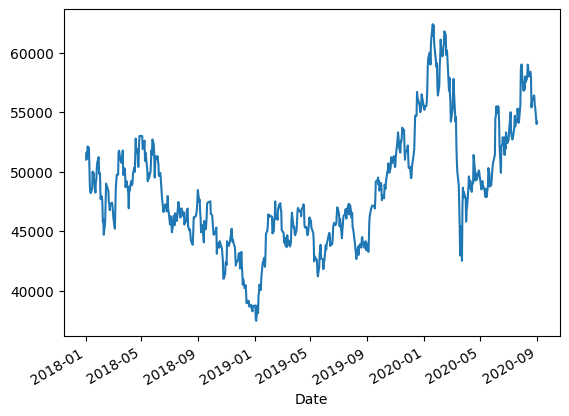

In [26]:
df.Close.plot()

---

In [35]:
amzn = web.get_data_yahoo('AMZN', start='2000-01-01', end='2020-09-01')
amzn.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1999-12-31,3.968750,3.800000,3.965625,3.806250,145414000,3.806250
2000-01-03,4.478125,3.952344,4.075000,4.468750,322352000,4.468750
2000-01-04,4.575000,4.087500,4.268750,4.096875,349748000,4.096875
2000-01-05,3.756250,3.400000,3.525000,3.487500,769148000,3.487500
2000-01-06,3.634375,3.200000,3.565625,3.278125,375040000,3.278125


In [40]:
amzn_ret = amzn["Adj Close"].pct_change()
amzn_ret.head()

Date
1999-12-31         NaN
2000-01-03    0.174056
2000-01-04   -0.083217
2000-01-05   -0.148741
2000-01-06   -0.060036
Name: Adj Close, dtype: float64

In [41]:
amzn_ret.dropna(inplace=True)
amzn_ret.head()

Date
2000-01-03    0.174056
2000-01-04   -0.083217
2000-01-05   -0.148741
2000-01-06   -0.060036
2000-01-07    0.061010
Name: Adj Close, dtype: float64

In [42]:
amaz_ret.describe()

count    5200.000000
mean        0.001262
std         0.032724
min        -0.247661
25%        -0.011979
50%         0.000525
75%         0.013879
max         0.344714
Name: Adj Close, dtype: float64

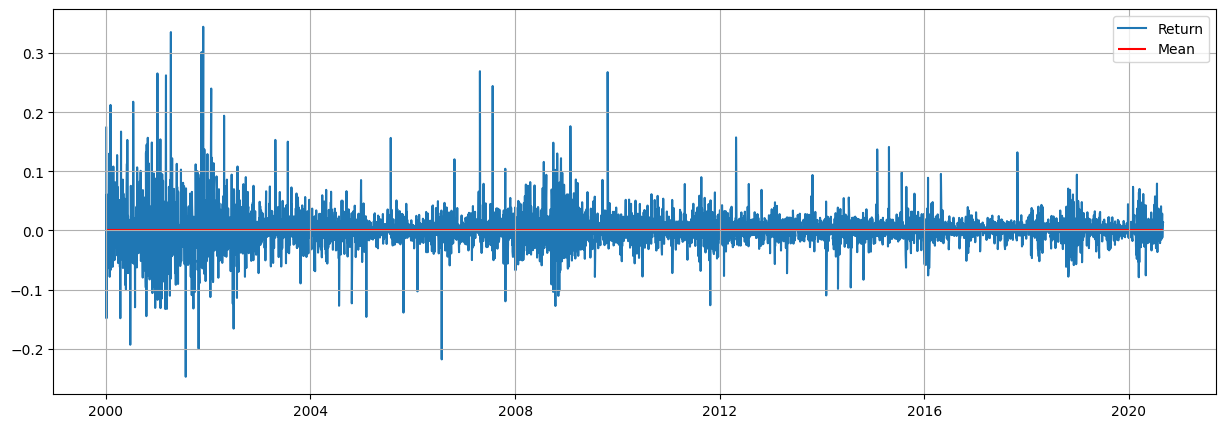

In [48]:
plt.figure(figsize=(15, 5))
plt.plot(amzn_ret.index, amzn_ret, label="Return", zorder=0)
plt.hlines(amzn_ret.mean(), amzn_ret.index[0], amzn_ret.index[-1], label='Mean', color='r', zorder=1)
plt.legend(loc='best')
plt.grid()

In [52]:
import seaborn as sns
import scipy as sp

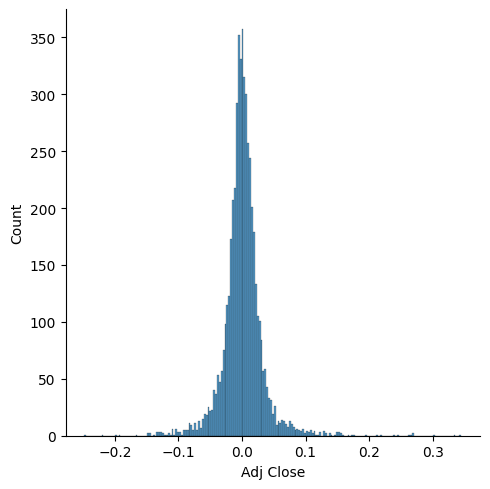

In [64]:
sns.displot(amzn_ret, kde=False)

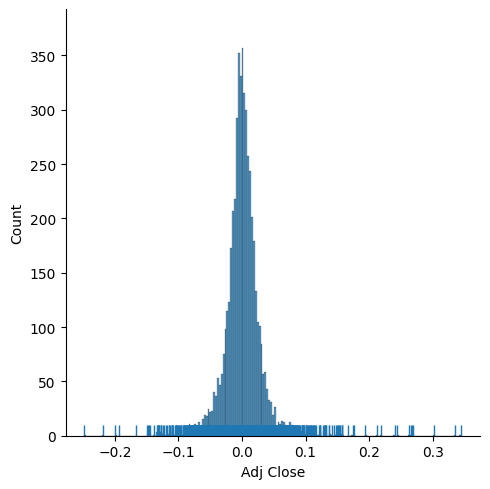

In [65]:
sns.displot(amzn_ret, rug=True, kde=False)

In [66]:
sp.stats.skew(amzn_ret), sp.stats.kurtosis(amzn_ret)

(1.1850054943026191, 15.36690244202897)

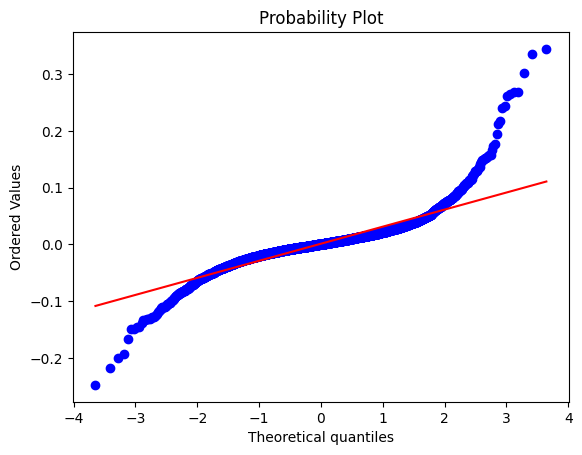

In [67]:
ax = plt.subplot()
sp.stats.probplot(amzn_ret, plot=ax)
plt.show()

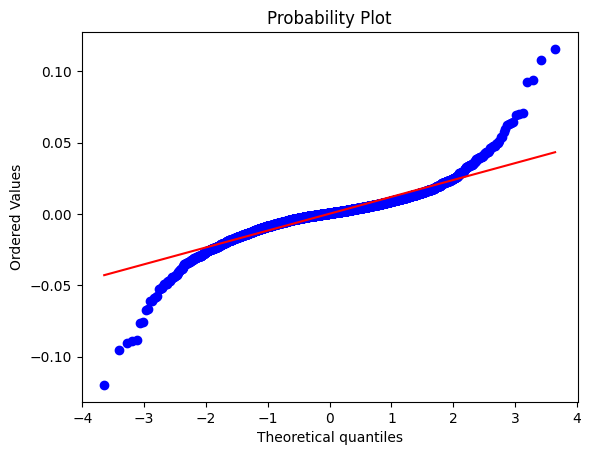

In [70]:
sp500 = web.get_data_yahoo("^GSPC", start='2000-01-01', end='2020-09-01')
ax = plt.subplot()
sp.stats.probplot(sp500["Adj Close"].pct_change().dropna(), plot=ax)
plt.show()

In [71]:
sp.stats.kstest(amzn_ret, 'norm')

KstestResult(statistic=0.4549856247891738, pvalue=0.0)

In [73]:
sp500_ret = sp500['Adj Close'].pct_change().dropna()
sp.stats.kstest(sp500_ret, 'norm')

KstestResult(statistic=0.4776548224950755, pvalue=0.0)

In [74]:
sp.stats.jarque_bera(amzn_ret)

Jarque_beraResult(statistic=52381.03926227152, pvalue=0.0)

In [76]:
sp.stats.jarque_bera(sp500_ret)

Jarque_beraResult(statistic=25506.096527600126, pvalue=0.0)

In [77]:
ind5 = web.DataReader('5_industry_Portfolios', 'famafrench', start='1990-01-01', end='2020-09-01')
ind5_ret = ind5[0] / 100
ind5_ret.head()

,Cnsmr,Manuf,HiTec,Hlth,Other
Date,,,,,
1990-01,-0.0749,-0.0560,-0.0856,-0.0736,-0.0887
1990-02,0.0135,0.0216,0.0157,-0.0206,0.0252
1990-03,0.0451,0.0172,0.0430,0.0385,-0.0026
1990-04,-0.0155,-0.0354,-0.0281,0.0029,-0.0346
1990-05,0.0987,0.0700,0.1079,0.1277,0.0910


In [78]:
ind5_ret.corr()

,Cnsmr,Manuf,HiTec,Hlth,Other
Cnsmr,1.000000,0.773350,0.706996,0.660408,0.851185
Manuf,0.773350,1.000000,0.653943,0.574638,0.809202
HiTec,0.706996,0.653943,1.000000,0.540132,0.694832
Hlth,0.660408,0.574638,0.540132,1.000000,0.641547
Other,0.851185,0.809202,0.694832,0.641547,1.000000


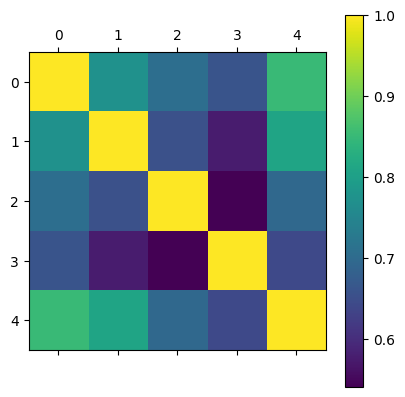

In [79]:
plt.matshow(ind5_ret.corr())
plt.colorbar()

<AxesSubplot: >

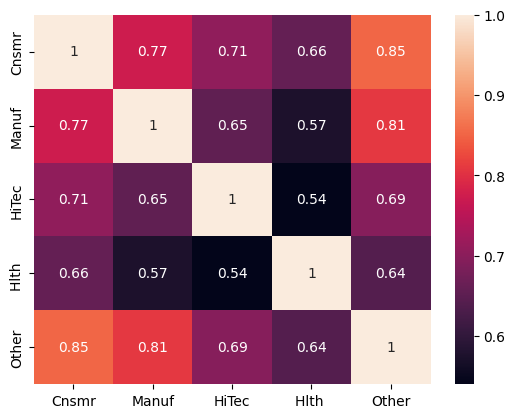

In [80]:
import seaborn as sns
sns.heatmap(ind5_ret.corr(), annot=True)

<AxesSubplot: >

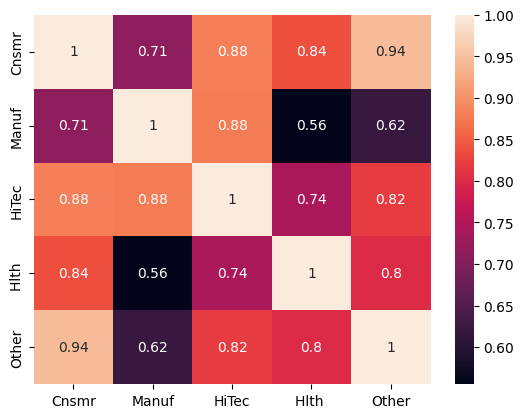

In [82]:
crisis1 = ind5_ret.loc['2007-01':'2008-12']
sns.heatmap(crisis1.corr(), annot=True)

<AxesSubplot: >

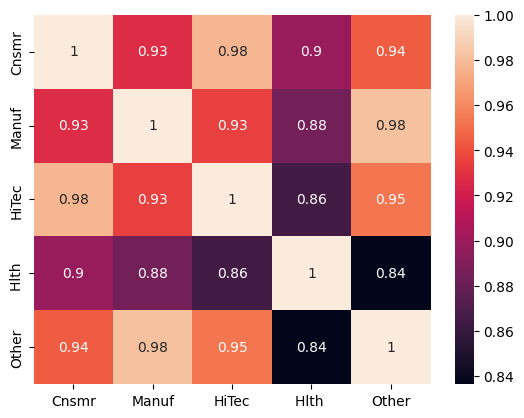

In [83]:
crisis2 = ind5_ret.loc['2020-01':'2020-9']
sns.heatmap(crisis2.corr(), annot=True)

In [85]:
ind10 = web.DataReader('10_industry_Portfolios', 'famafrench', start='1990-01-01', end='2020-09-01')
ind10_ret = ind10[0] / 100
ind10_ret.head()

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
1990-01,-0.0943,-0.0384,-0.0633,-0.0430,-0.0128,-0.1339,-0.0643,-0.0736,-0.0535,-0.0887
1990-02,-0.0039,0.0513,0.0256,0.0310,0.0411,-0.0035,0.0199,-0.0206,0.0021,0.0252
1990-03,0.0454,0.0290,0.0392,-0.0057,0.0446,0.0418,0.0511,0.0385,-0.0075,-0.0026
1990-04,-0.0027,-0.0404,-0.0273,-0.0354,-0.0200,-0.0346,-0.0210,0.0029,-0.0551,-0.0346
1990-05,0.0904,0.0776,0.0808,0.0603,0.1254,0.0938,0.1165,0.1277,0.0543,0.0910


<AxesSubplot: >

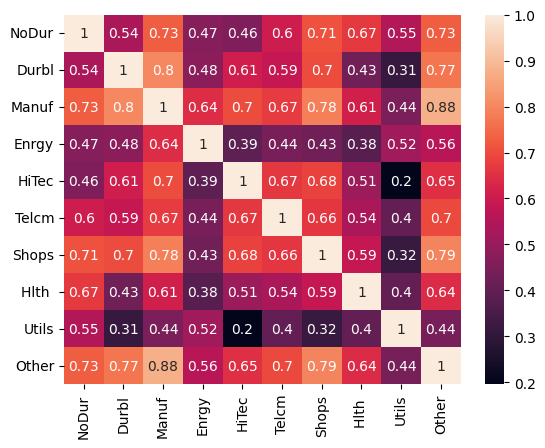

In [86]:
sns.heatmap(ind10_ret.corr(), annot=True)

<AxesSubplot: >

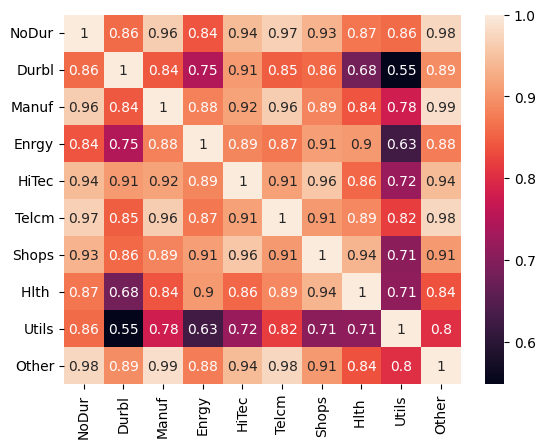

In [87]:
crisis1 = ind10_ret.loc['2020-01':'2020-9']
sns.heatmap(crisis1.corr(), annot=True)

<AxesSubplot: >

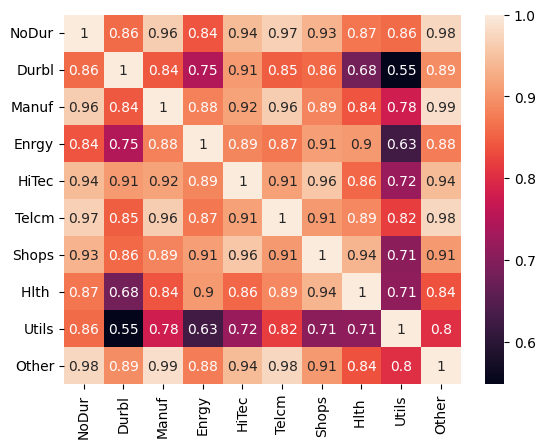

In [88]:
crisis2 = ind10_ret.loc['2020-01':'2020-9']
sns.heatmap(crisis2.corr(), annot=True)

In [89]:
vix = web.get_data_yahoo('^VIX', start="2000-01-01", end='2020-09-01')
vix.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1999-12-31,25.200001,24.450001,25.030001,24.639999,0,24.639999
2000-01-03,26.150000,23.980000,24.360001,24.209999,0,24.209999
2000-01-04,27.180000,24.799999,24.940001,27.010000,0,27.010000
2000-01-05,29.000000,25.850000,27.980000,26.410000,0,26.410000
2000-01-06,26.709999,24.700001,26.680000,25.730000,0,25.730000


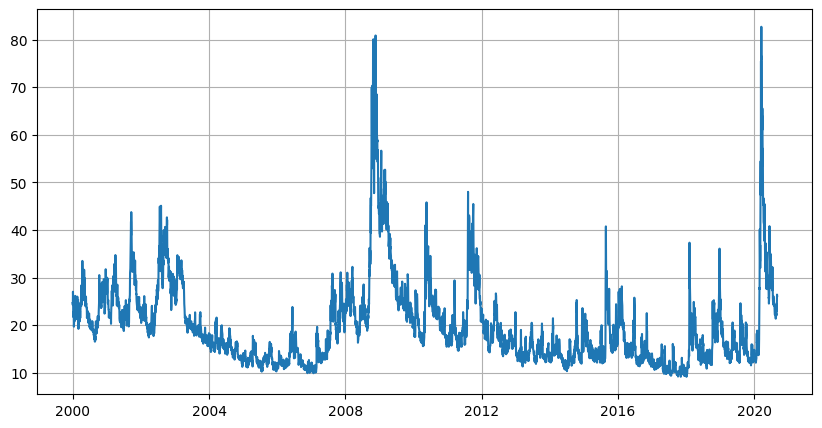

In [92]:
plt.figure(figsize=(10, 5))
plt.plot(vix.index, vix.Close)
plt.grid()

#### Check how the trimmed returns affect the mean return
 In other words, if we trim the most positive and the most negative return, how does it affect the overall average return?

트리밍된 리턴이 평균 리턴에 어떤 영향을 미치는지 확인합니다.
다시 말해, 우리가 가장 긍정적이고 가장 부정적인 수익률을 줄인다면, 그것이 전체 평균 수익률에 어떤 영향을 미칠까요?

#### We will look into the returns of S&P 500 (but you may practice with other stocks or indices)

In [95]:
import pandas as pd
import numpy as np

sp500 = web.get_data_yahoo("^GSPC", start='1990-01-01', end='2020-09-01')['Adj Close'].pct_change().dropna()
sp500.head()

Date
1990-01-03   -0.002586
1990-01-04   -0.008613
1990-01-05   -0.009756
1990-01-08    0.004514
1990-01-09   -0.011787
Name: Adj Close, dtype: float64

In [96]:
sp500_sort = sp500.sort_values()
sp500_sort.head()

Date
2020-03-16   -0.119841
2020-03-12   -0.095113
2008-10-15   -0.090350
2008-12-01   -0.089295
2008-09-29   -0.088068
Name: Adj Close, dtype: float64

In [97]:
sp500_sort.shape

(7727,)

In [98]:
n = sp500_sort.shape[0]

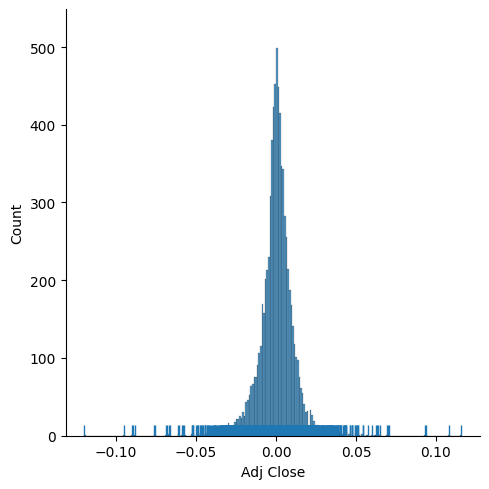

In [99]:
sns.displot(sp500_sort, rug=True, kde=False)

In [101]:
print("Daily maen: " '%.3f%%' % (sp500_sort.mean() * 100))
print("Annualized mean: " '%.3f%%' % (sp500_sort.mean() * 252 * 100))

Daily maen: 0.036%
Annualized mean: 9.108%


In [102]:
means = pd.Series(sp500_sort.mean(), index=[0])
means

0    0.000361
dtype: float64

In [103]:
for i in range(100):
    means[i + 1] = sp500_sort[i+1:-(i+1)].mean()
means.tail()

96     0.000376
97     0.000377
98     0.000377
99     0.000377
100    0.000377
dtype: float64

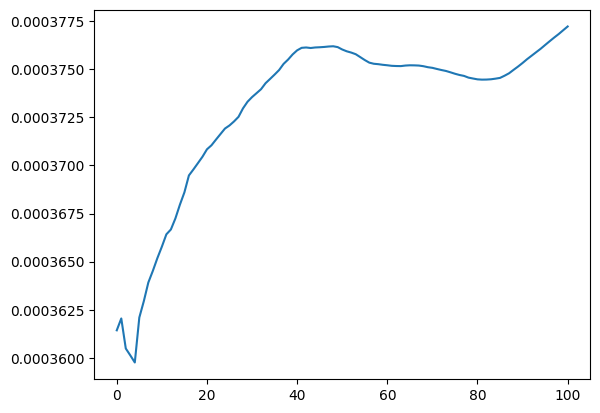

In [104]:
plt.plot(means)

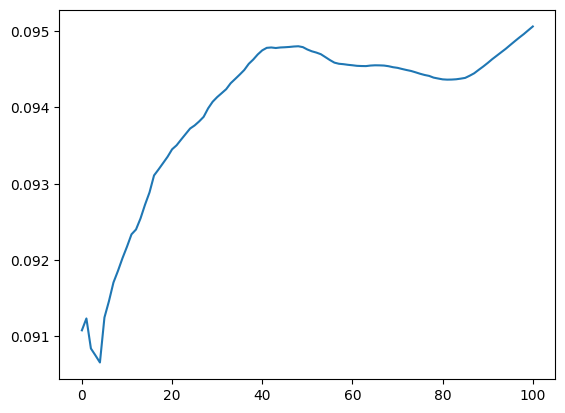

In [105]:
plt.plot(means * 252)

In [106]:
means_np = np.full(100, np.nan)
for i in range(1, 101):
    means_np[i - 1] = sp500_sort[i:-i].mean()
means_np

array([0.00036205, 0.00036048, 0.00036013, 0.00035976, 0.00036209,
       0.00036294, 0.00036391, 0.00036452, 0.00036518, 0.00036578,
       0.00036642, 0.00036667, 0.00036724, 0.00036796, 0.0003686 ,
       0.00036948, 0.00036979, 0.00037012, 0.00037045, 0.00037084,
       0.00037105, 0.00037134, 0.00037163, 0.00037192, 0.00037208,
       0.00037229, 0.00037253, 0.00037297, 0.00037331, 0.00037355,
       0.00037376, 0.00037396, 0.00037427, 0.00037449, 0.00037472,
       0.00037496, 0.00037528, 0.0003755 , 0.00037577, 0.00037598,
       0.00037611, 0.00037613, 0.0003761 , 0.00037613, 0.00037614,
       0.00037616, 0.00037618, 0.00037619, 0.00037615, 0.00037603,
       0.00037593, 0.00037586, 0.00037578, 0.00037563, 0.00037548,
       0.00037534, 0.00037528, 0.00037526, 0.00037523, 0.00037521,
       0.00037518, 0.00037517, 0.00037516, 0.00037519, 0.0003752 ,
       0.0003752 , 0.00037519, 0.00037516, 0.0003751 , 0.00037507,
       0.00037501, 0.00037496, 0.00037491, 0.00037484, 0.00037

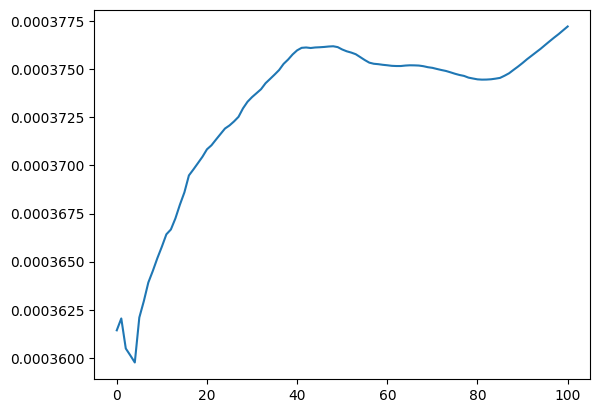

In [107]:
prop1 = np.arange(0, 101) / n
trim1 = np.full(101, np.nan)
for i in range(101):
    trim1[i] = sp.stats.trim_mean(sp500_sort, prop1[i])

plt.plot(trim1)

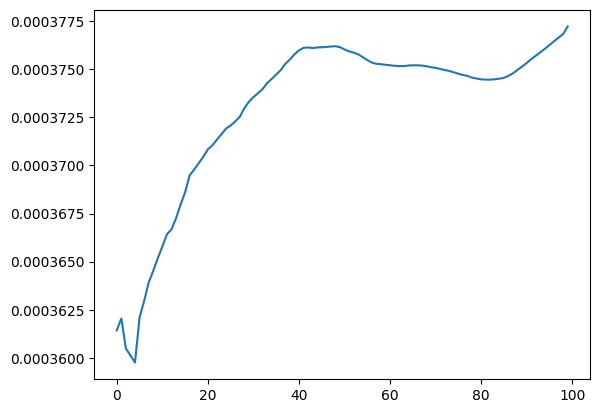

In [109]:
prop2 = np.linspace(0, 100/n, 100)
trim2 = np.full(prop2.shape[0], np.nan)
for i in range(prop2.shape[0]):
    trim2[i] = sp.stats.trim_mean(sp500_sort, prop2[i])
plt.plot(trim2)

---

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

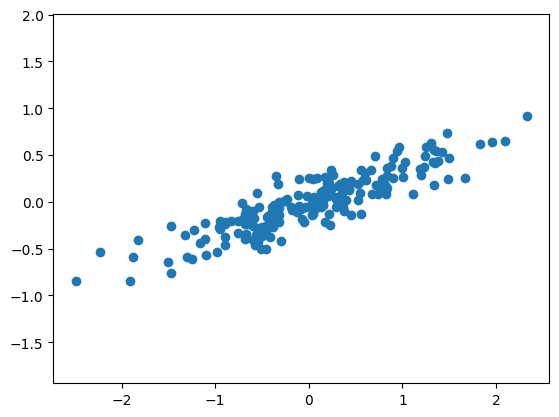

In [111]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

In [114]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [116]:
print(pca.components_)
print(pca.explained_variance_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
[0.7625315 0.0184779]


In [118]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape : ", X.shape)
print("transformed shape : ", X_pca.shape)

original shape :  (200, 2)
transformed shape :  (200, 1)


Text(0, 0.5, 'cumulative explained variance')

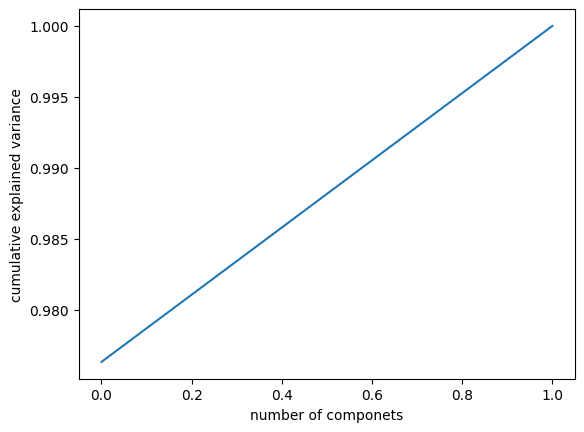

In [121]:
pca = PCA().fit(X.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of componets')
plt.ylabel('cumulative explained variance')

---

In [122]:
start_date = '2010-01-01'
end_date = '2021-12-31'

In [123]:
df = web.get_data_yahoo(['^GSPC', 'NFLX'], start=start_date, end=end_date)['Adj Close']
df.head()

Symbols,^GSPC,NFLX
Date,,
2009-12-31,1115.099976,7.870000
2010-01-04,1132.989990,7.640000
2010-01-05,1136.520020,7.358571
2010-01-06,1137.140015,7.617143
2010-01-07,1141.689941,7.485714


In [127]:
df.rename(columns={'^GSPC':'S%P500'}, inplace=True)
df.head(5)

Symbols,S%P500,NFLX
Date,,
2009-12-31,1115.099976,7.870000
2010-01-04,1132.989990,7.640000
2010-01-05,1136.520020,7.358571
2010-01-06,1137.140015,7.617143
2010-01-07,1141.689941,7.485714


In [128]:
ret = df.pct_change().dropna()
ret.head()

Symbols,S%P500,NFLX
Date,,
2010-01-04,0.016043,-0.029225
2010-01-05,0.003116,-0.036836
2010-01-06,0.000546,0.035139
2010-01-07,0.004001,-0.017254
2010-01-08,0.002882,0.017176


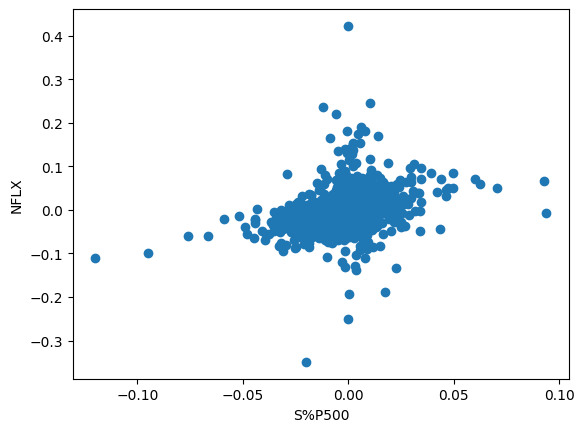

In [131]:
 plt.scatter(ret['S%P500'], ret['NFLX'])
 plt.xlabel('S%P500')
 plt.ylabel('NFLX')
 plt.show()

In [133]:
import statsmodels.api as sm

Y = ret['NFLX']
X = sm.add_constant(ret["S%P500"])
model = sm.OLS(Y, X)
results = model.fit()
results.params

const     0.001398
S%P500    0.990904
dtype: float64

In [134]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   NFLX   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     391.5
Date:                Mon, 17 Oct 2022   Prob (F-statistic):           4.86e-82
Time:                        14:29:18   Log-Likelihood:                 6330.7
No. Observations:                3021   AIC:                        -1.266e+04
Df Residuals:                    3019   BIC:                        -1.265e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0014      0.001      2.578      0.0

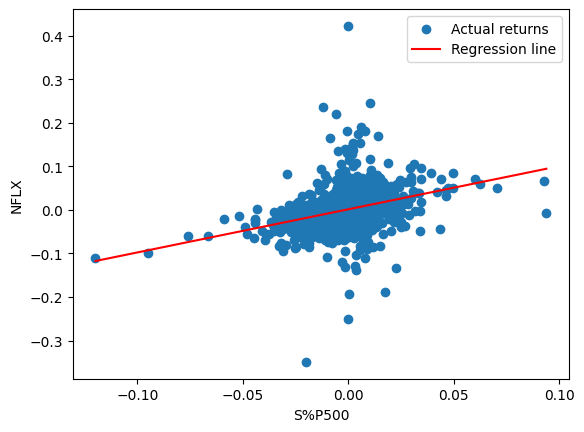

In [137]:
x_new = np.linspace(np.min(ret['S%P500']), np.max(ret['S%P500']), 10)
X_new = sm.add_constant(x_new)
y_new = np.dot(X_new, results.params)

plt.scatter(ret["S%P500"], ret['NFLX'], label='Actual returns')
plt.plot(x_new, y_new, 'r-', label="Regression line")
plt.xlabel("S%P500")
plt.ylabel("NFLX")
plt.legend()
plt.show()

In [138]:
alpha = 0.01
nflx_low = ret.NFLX.quantile(alpha)
nflx_high = ret.NFLX.quantile(1 - alpha)
ret_trim = ret[(ret.NFLX > nflx_low) & (ret.NFLX < nflx_high)]
ret.min(), ret.max(), ret_trim.min(), ret_trim.max()

(Symbols
 S%P500   -0.119841
 NFLX     -0.348957
 dtype: float64,
 Symbols
 S%P500    0.093828
 NFLX      0.422235
 dtype: float64,
 Symbols
 S%P500   -0.075970
 NFLX     -0.073716
 dtype: float64,
 Symbols
 S%P500    0.093828
 NFLX      0.088303
 dtype: float64)

In [141]:
Y = ret_trim['NFLX']
X = sm.add_constant(ret_trim['S%P500'])
model = sm.OLS(Y, X)
result = model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   NFLX   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     391.5
Date:                Mon, 17 Oct 2022   Prob (F-statistic):           4.86e-82
Time:                        14:41:16   Log-Likelihood:                 6330.7
No. Observations:                3021   AIC:                        -1.266e+04
Df Residuals:                    3019   BIC:                        -1.265e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0014      0.001      2.578      0.0